###Gingivitis image classification by tensorflow_lite

## Setup

Import TensorFlow and other necessary libraries:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


# Download Dataset

## Dataset

In [ ]:
!gdown --id 1fGlLiZr_yK-oiof_hk-iof01kCGEZK6E

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1fGlLiZr_yK-oiof_hk-iof01kCGEZK6E
To: /content/DATASET.zip
100% 20.4M/20.4M [00:00<00:00, 45.3MB/s]


In [ ]:
!unzip /content/DATASET.zip

Archive:  /content/DATASET.zip
   creating: DATASET/Gingivitis/
  inflating: DATASET/Gingivitis/-10-_jpg.rf.2915d74c252c1c90cf0b9f42c618f5e3.jpg  
  inflating: DATASET/Gingivitis/-100-_jpg.rf.6e92018b305ebbea638fd7d78e557b7b.jpg  
  inflating: DATASET/Gingivitis/-105-_jpg.rf.2aee841c8593db912def0adc62cbaccd.jpg  
  inflating: DATASET/Gingivitis/-106-_jpg.rf.a1c28aca3ad910ed6bfa8174c3daaa06.jpg  
  inflating: DATASET/Gingivitis/-11-_jpg.rf.1531a61303e3c7302f6a2933e59aedde.jpg  
  inflating: DATASET/Gingivitis/-112-_jpg.rf.5838d2bc279ffdb2ef3ef59f4f1182ce.jpg  
  inflating: DATASET/Gingivitis/-118-_jpg.rf.755f1aa98c6cdd6299874a4c2d91bc5d.jpg  
  inflating: DATASET/Gingivitis/-121-_jpg.rf.d018421357f5c3f9365c5c72a9522a49.jpg  
  inflating: DATASET/Gingivitis/-123-_jpg.rf.1cc5421c8674c51ec86427c9409bc6a1.jpg  
  inflating: DATASET/Gingivitis/-125-_jpg.rf.2decc5eca5003dd71bbb173d6d2f1a39.jpg  
  inflating: DATASET/Gingivitis/-129-_jpg.rf.dcc2111633f83ab3559b8a59376a9b63.jpg  
  inflating: D

## Test set

In [ ]:
!gdown --id 1kpmztq78qNQp9UqinczLxpCfPNpqODng

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1kpmztq78qNQp9UqinczLxpCfPNpqODng
To: /content/test.zip
100% 3.08M/3.08M [00:00<00:00, 19.1MB/s]


In [ ]:
!unzip /content/test.zip

Archive:  /content/test.zip
   creating: test/Gingivitis/
  inflating: test/Gingivitis/-116-_jpg.rf.1e7da62e738c35940f6e9f13c1dc558e.jpg  
  inflating: test/Gingivitis/-175-_jpg.rf.7040b7c7ca5d9e0e7e406ee31913d0d0.jpg  
  inflating: test/Gingivitis/-32-_jpg.rf.eb34a347786d31ae15c6c49e2261e191.jpg  
  inflating: test/Gingivitis/-324-_jpg.rf.dc281476a39896d90d75e004683387f3.jpg  
  inflating: test/Gingivitis/-33-_jpg.rf.6b9278b1ec3b1294e10ab2bf1fa686a5.jpg  
  inflating: test/Gingivitis/-337-_jpg.rf.3504cee1f230a590002b6276a41b07be.jpg  
  inflating: test/Gingivitis/-418-_jpg.rf.eeef5e5bfd5bdd187f42e84507daf695.jpg  
  inflating: test/Gingivitis/-442-_jpg.rf.472e38c0239b342f74f8fcafaad27c56.jpg  
  inflating: test/Gingivitis/-468-_jpg.rf.54a34d94d041f27b42d313f40ad15a70.jpg  
  inflating: test/Gingivitis/-494-_jpg.rf.6634fd2ebc85fe7a98cfc35f70ef4cb8.jpg  
  inflating: test/Gingivitis/-507-_jpg.rf.85334dd629281cb8faf578fbb92a2f06.jpg  
  inflating: test/Gingivitis/-509-_jpg.rf.7968d75e478

## User dataset

In [ ]:
!gdown --id 1yZgRorknADD7CCRQocSc_P8eJjPLP3A3

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1yZgRorknADD7CCRQocSc_P8eJjPLP3A3
To: /content/Gum.zip
100% 6.20M/6.20M [00:00<00:00, 38.0MB/s]


In [ ]:
!unzip /content/Gum

Archive:  /content/Gum.zip
   creating: Gum/Gum/
  inflating: Gum/Gum/S__13426691_0.jpg  
  inflating: Gum/Gum/S__13426693_0.jpg  
  inflating: Gum/Gum/S__13426694_0.jpg  
  inflating: Gum/Gum/S__13426695_0.jpg  
  inflating: Gum/Gum/S__13426696_0.jpg  
  inflating: Gum/Gum/S__13426697_0.jpg  
  inflating: Gum/Gum/S__13426698_0.jpg  
  inflating: Gum/Gum/S__13426699_0.jpg  
  inflating: Gum/Gum/S__13426700_0.jpg  
  inflating: Gum/Gum/S__13426701_0.jpg  
  inflating: Gum/Gum/S__13426702_0.jpg  
  inflating: Gum/Gum/S__13426704_0.jpg  
  inflating: Gum/Gum/S__13426705_0.jpg  
  inflating: Gum/Gum/S__13426706_0.jpg  
  inflating: Gum/Gum/S__13426707_0.jpg  
  inflating: Gum/Gum/S__13426708_0.jpg  
  inflating: Gum/Gum/S__13426709_0.jpg  
  inflating: Gum/Gum/S__13426710_0.jpg  
  inflating: Gum/Gum/S__13426711_0.jpg  
  inflating: Gum/Gum/S__13426712_0.jpg  
  inflating: Gum/Gum/S__13426713_0.jpg  
  inflating: Gum/Gum/S__13426715_0.jpg  
  inflating: Gum/Gum/S__13426716_0.jpg  
  inflat

In [ ]:
import pathlib
data_dir = '/content/DATASET'
data_dir = pathlib.Path(data_dir).with_suffix('')

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

474


In [ ]:
from PIL import Image

# Split dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

80% of the images for training and 20% for validation.
*test dataset not include

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 474 files belonging to 2 classes.
Using 380 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 474 files belonging to 2 classes.
Using 94 files for validation.


In [ ]:
test_folder_path = '/content/test'

# Load test dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_folder_path,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int'  # For sparse categorical crossentropy
)

Found 72 files belonging to 2 classes.


class names

In [ ]:
class_names = test_ds.class_names
num_classes = len(class_names)
print(f'Class names: {class_names}')
print(f'Number of classes: {num_classes}')

Class names: ['Gingivitis', 'Healthy']
Number of classes: 2


# Visualize the data



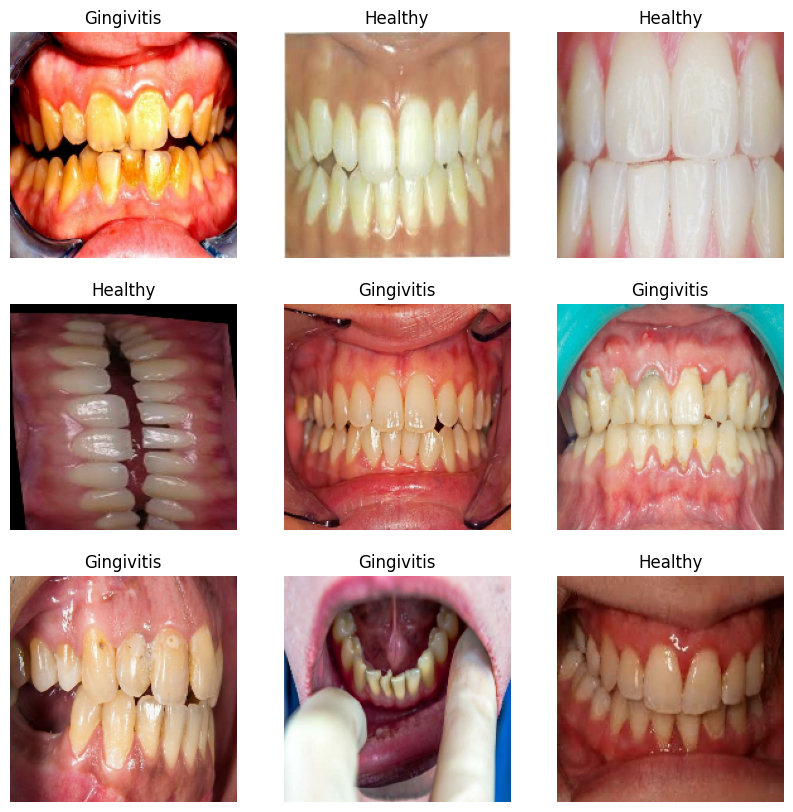

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


#Create the model



In [ ]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile the model

For this tutorial, choose the `tf.keras.optimizers.Adam` optimizer and `tf.keras.losses.SparseCategoricalCrossentropy` loss function. To view training and validation accuracy for each training epoch, pass the `metrics` argument to `Model.compile`.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Model summary

View all the layers of the network using the Keras `Model.summary` method:

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

### Train the model

In [ ]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
12/12 [==============================] - 7s 134ms/step - loss: 0.8132 - accuracy: 0.7211 - val_loss: 0.4820 - val_accuracy: 0.7979
Epoch 2/30
12/12 [==============================] - 1s 53ms/step - loss: 0.4787 - accuracy: 0.7816 - val_loss: 0.4660 - val_accuracy: 0.7979
Epoch 3/30
12/12 [==============================] - 1s 48ms/step - loss: 0.4747 - accuracy: 0.7816 - val_loss: 0.4430 - val_accuracy: 0.7979
Epoch 4/30
12/12 [==============================] - 0s 34ms/step - loss: 0.4548 - accuracy: 0.7868 - val_loss: 0.7030 - val_accuracy: 0.7979
Epoch 5/30
12/12 [==============================] - 0s 36ms/step - loss: 0.4901 - accuracy: 0.7895 - val_loss: 0.4050 - val_accuracy: 0.7979
Epoch 6/30
12/12 [==============================] - 0s 29ms/step - loss: 0.3969 - accuracy: 0.8132 - val_loss: 0.3647 - val_accuracy: 0.8617
Epoch 7/30
12/12 [==============================] - 0s 31ms/step - loss: 0.3511 - accuracy: 0.8316 - val_loss: 0.3479 - val_accuracy: 0.8830
Epoch 8/30
1

## Visualize training results

Create plots of the loss and accuracy on the training and validation sets:

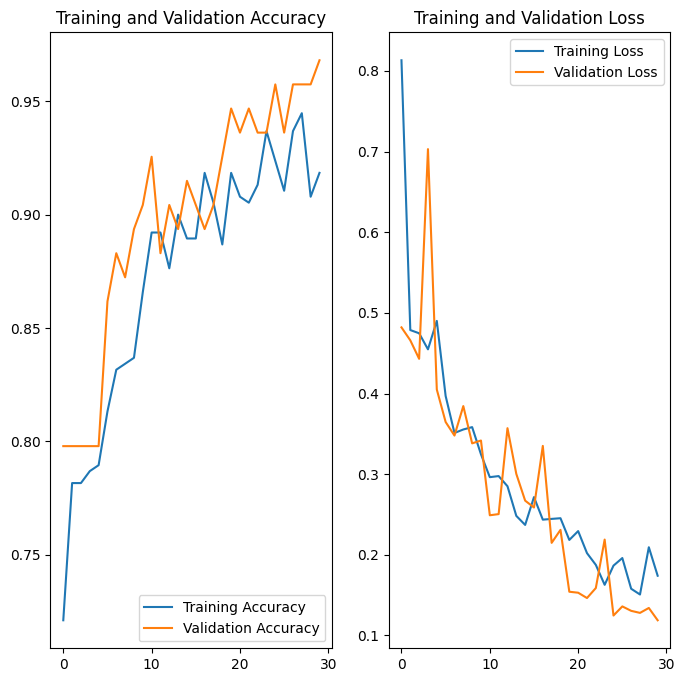

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The plots show that training accuracy and validation accuracy are off by large margins, and the model has achieved only around 60% accuracy on the validation set.

The following tutorial sections show how to inspect what went wrong and try to increase the overall performance of the model.

3/3 [==============================] - 0s 9ms/step


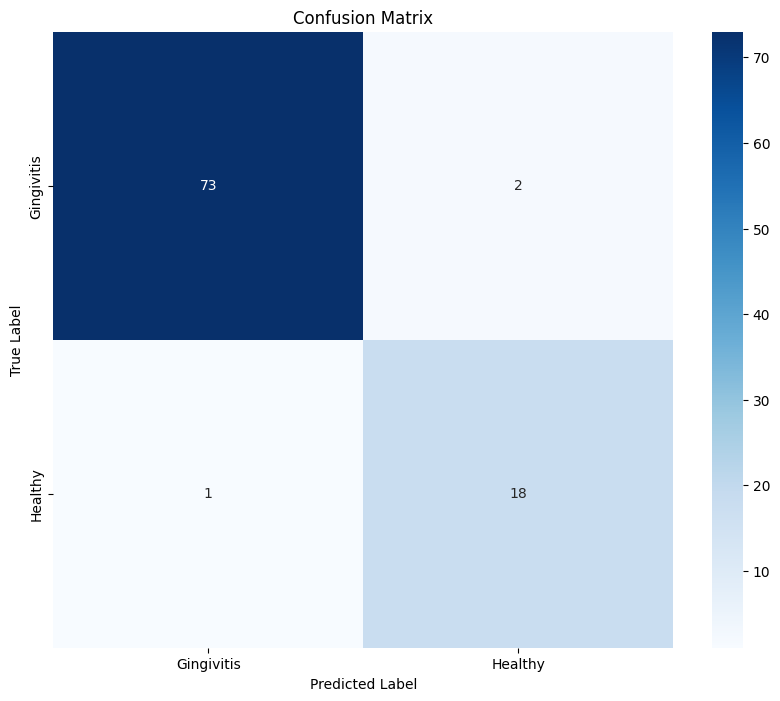

In [ ]:
y_true = np.concatenate([y for x, y in val_ds], axis=0)
y_pred = np.argmax(model.predict(val_ds), axis=-1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

3/3 [==============================] - 0s 9ms/step


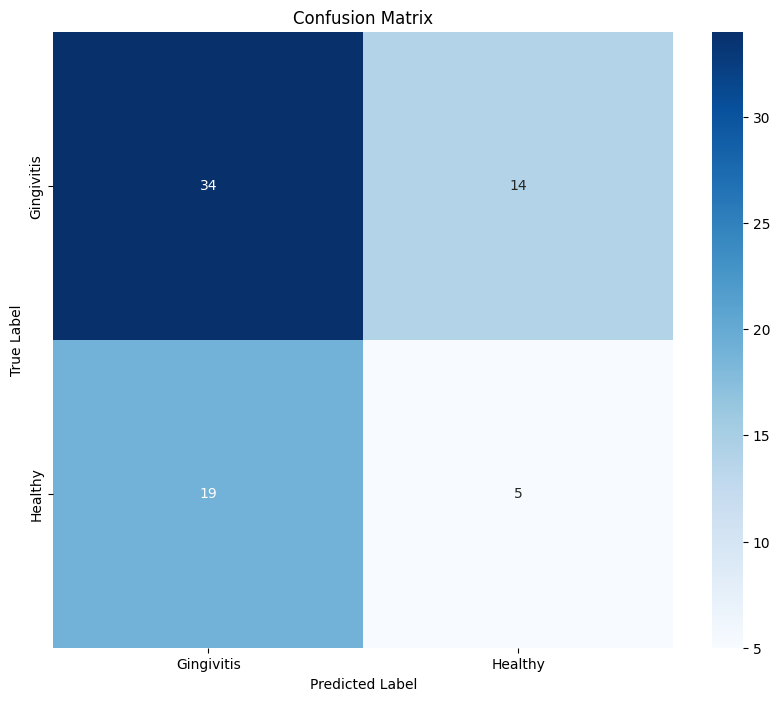

In [ ]:
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = np.argmax(model.predict(test_ds), axis=-1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

3/3 [==============================] - 0s 10ms/step - loss: 0.3343 - accuracy: 0.7361
Test loss: 0.3342997133731842
Test accuracy: 0.7361111044883728


# Load Model


In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

### Run the TensorFlow Lite model

You can access the TensorFlow Lite saved model signatures in Python via the `tf.lite.Interpreter` class.

Load the model with the `Interpreter`:

In [ ]:
TF_MODEL_FILE_PATH = '/content/model.tflite' # The default path to the saved TensorFlow Lite model

interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

Print the signatures from the converted model to obtain the names of the inputs (and outputs):


In [ ]:
interpreter.get_signature_list()

{'serving_default': {'inputs': ['sequential_input'], 'outputs': ['dense_1']}}

In this example, you have one default signature called `serving_default`. In addition, the name of the `'inputs'` is `'sequential_1_input'`, while the `'outputs'` are called `'outputs'`. You can look up these first and last Keras layer names when running `Model.summary`, as demonstrated earlier in this tutorial.

Now you can test the loaded TensorFlow Model by performing inference on a sample image with `tf.lite.Interpreter.get_signature_runner` by passing the signature name as follows:

In [ ]:
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite

Similar to what you did earlier in the tutorial, you can use the TensorFlow Lite model to classify images that weren't included in the training or validation sets.

You have already tensorized that image and saved it as `img_array`. Now, pass it to the first argument (the name of the `'inputs'`) of the loaded TensorFlow Lite model (`predictions_lite`), compute softmax activations, and then print the prediction for the class with the highest computed probability.

In [3]:
url = "https://smilestudionc.com/wp-content/uploads/2021/03/gingivitis.jpg"
path = tf.keras.utils.get_file('Gingivitis', origin=url)

img = tf.keras.utils.load_img(
    path, target_size=(180,180)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch


In [4]:
img_array.shape

TensorShape([1, 180, 180, 3])

In [ ]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)

This image most likely belongs to Gingivitis with a 98.45 percent confidence.


##### Copyright 2018 The TensorFlow Authors.